#1. Titanic DataSet Introduction
##Understanding Real-life dataset
###It contains the following info:

**survival** - Survival (0 = No; 1 = Yes)
**class** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
**name** - Name
**sex** - Sex
**age** - Age
**sibsp** - Number of Siblings/Spouses Aboard
**parch** - Number of Parents/Children Aboard
**ticket** - Ticket Number
**fare** - Passenger Fare
**cabin** - Cabin
**embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
**boat** - Lifeboat (if survived)
**body** - Body number (if did not survive and body was recovered)

Note: Data covers passengers only, not crew.

### 1.1 Imports

In [1]:
# Basic library imports
from google.colab import drive
import os
import pandas as pd
import numpy as np
from pandas import read_csv as csvreader
from pandas import read_csv

#Plots  for EDA
import matplotlib.pyplot as plt
import seaborn as sns



### 1.1 Load the Data in Memory


1.   Add the required pyhton library imports
2.   Load the dataset
3.   Check the head values(max till 10) to understand the relationship b/w attributes

In [2]:
def load_data(mount_path , file_path):
    drive.mount(mount_path)
    #load the csv in the memory
    data = pd.read_csv(file_path)
    return data

In [3]:
titanic_dataset = load_data("/content/gdrive" , '/content/gdrive/MyDrive/Kaggle/Titanic/train.csv')



Mounted at /content/gdrive


#3. **Combined Feature engineering**

In [4]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Titanic/train.csv')

    # reading test data
    test = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Titanic/test.csv')

    # extracting and then removing the targets from the training data
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)


    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

    return combined

combined = get_combined_data()

<ipython-input-4-bffb5be5968e>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop(['Survived'], 1, inplace=True)
<ipython-input-4-bffb5be5968e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = train.append(test)


In [5]:
combined.shape

(1309, 10)

In [6]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titles = set()
for name in titanic_dataset['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
   # status('Title')
    return combined

{'Ms', 'Lady', 'Sir', 'Master', 'Rev', 'Dr', 'Col', 'Mrs', 'Capt', 'Jonkheer', 'Mr', 'Don', 'Mme', 'Major', 'the Countess', 'Miss', 'Mlle'}


In [8]:
combined = get_titles()
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#3. **Handle missing values**



In [9]:
combined.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Title          1
dtype: int64

In [10]:
grouped_train = titanic_dataset.groupby(['Sex','Pclass'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Age']]

grouped_median_train.head()

<ipython-input-10-13a14d1f7507>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_median_train = grouped_train.median()


,Sex,Pclass,Age
0,female,1,35.0
1,female,2,28.0
2,female,3,21.5
3,male,1,40.0
4,male,2,30.0


In [11]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return combined

combined = process_age()

In [12]:
combined.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Title          1
dtype: int64

In [13]:
combined.iloc[:891].Embarked.mode()

0    S
Name: Embarked, dtype: object

In [14]:
combined.iloc[:891].Fare.median()

14.4542

In [15]:
combined.Embarked.fillna(combined.iloc[:891].Embarked.mode()[0],  inplace = True)
combined.Title.fillna(combined.iloc[:891].Title.mode()[0], inplace = True)
combined.Fare.fillna(combined.iloc[:891].Fare.median(), inplace = True)

#2. Understand basic attributes

### 2.1. Understand the attributes and dataset


1.   Check for datatype of different attributes
2.   list if any missing values in the dataset.
3.   list any unwanted entries in the attributes(e.g. special characters in numerical fields)
4.   Look for data volume( no.of columns and rows)
5.   Look for cardinality of each column.

In [16]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
titanic_dataset.shape

(891, 12)

In [18]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###2.3 **Univariate analysis**

<Axes: xlabel='Age', ylabel='Count'>

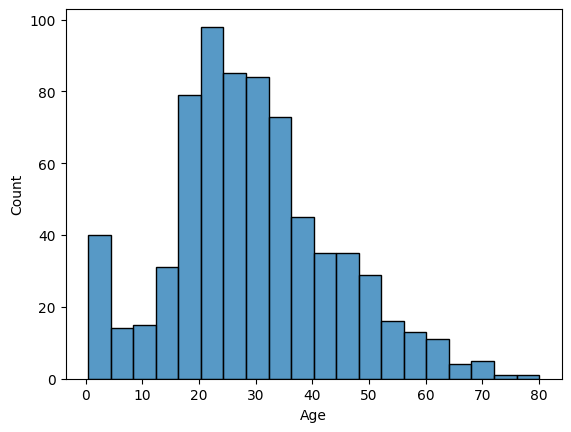

In [ ]:
sns.histplot(data=titanic_dataset, x="Age")

In [ ]:
titanic_dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
print(np.unique(titanic_dataset['Sex']))
print(titanic_dataset['Sex'].value_counts())

['female' 'male']
male      577
female    314
Name: Sex, dtype: int64


In [ ]:
print(np.unique(titanic_dataset['Pclass']))
print(titanic_dataset['Pclass'].value_counts())

[1 2 3]
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [ ]:
print(np.unique(titanic_dataset['SibSp']))
print(titanic_dataset['SibSp'].value_counts())

[0 1 2 3 4 5 8]
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [ ]:
titanic_dataset.Survived.mean()

0.3838383838383838

In [ ]:
 titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
 titanic_dataset['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.05, 'Survival Distribution')

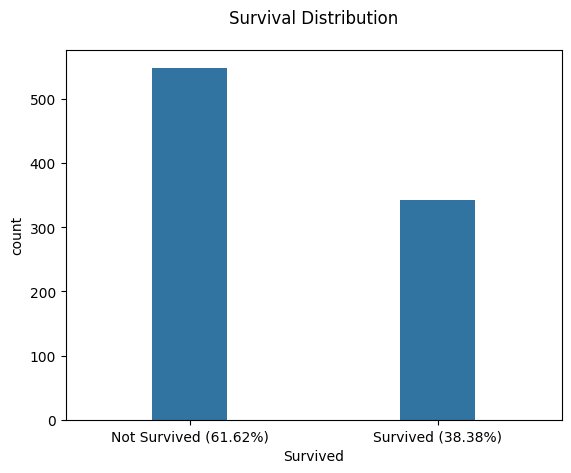

In [ ]:
#Take away: Always see in the training set , distribution of the target variable itself to see if there is enough data for all the target values.
#E.g. If there are very lesser occurrences of survived , then we might not have enough data to accurately predict

# use seaborn to build a bar plot of Titanic survival, which is your target variable

survived = titanic_dataset['Survived'].value_counts()[1]
not_survived = titanic_dataset['Survived'].value_counts()[0]
survived_per = survived / titanic_dataset.shape[0] * 100
not_survived_per = not_survived / titanic_dataset.shape[0] * 100

sns.countplot(x='Survived', data=titanic_dataset, width=0.3);
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])

#plt.xticks((1, 0), ['Survived ({0:.2f}%)'.format(survived_per), 'Not Survived ({0:.2f}%)'.format(not_survived_per)])
plt.title('Survival Distribution', size=12, y=1.05)
#Take-away: in the training set, less people survived than didn't

Text(0.5, 1.05, 'Sex Distribution')

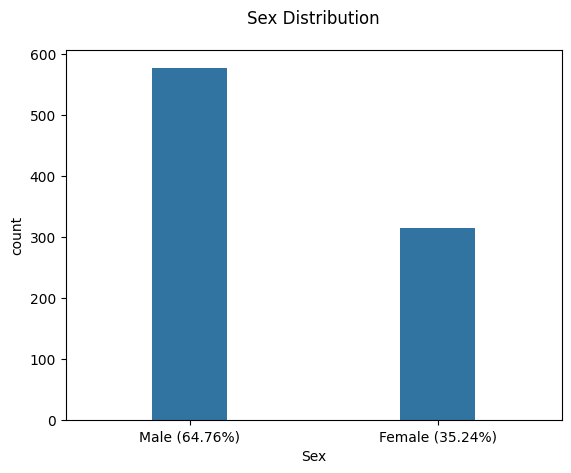

In [ ]:
# use seaborn to build a bar plot of the Titanic dataset feature 'Sex' (of df_train)

female = titanic_dataset['Sex'].value_counts()['female']
male = titanic_dataset['Sex'].value_counts()['male']
female_per = female / titanic_dataset.shape[0] * 100
male_per = male / titanic_dataset.shape[0] * 100

sns.countplot(x='Sex', data=titanic_dataset, width=0.3);
plt.xticks((1, 0), ['Female ({0:.2f}%)'.format(female_per), 'Male ({0:.2f}%)'.format(male_per)])
plt.title('Sex Distribution', size=12, y=1.05)

###2.4 **Bivariate analysis**

In [ ]:
titanic_dataset.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='Count'>

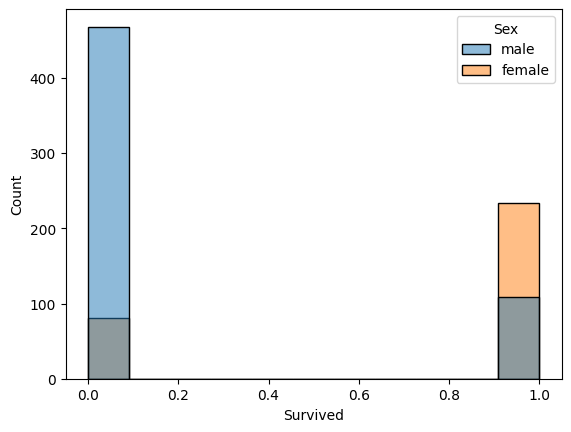

In [ ]:
# use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'
sns.histplot(data=titanic_dataset, x="Survived", hue="Sex")
# Take-away: Women were more likely to survive than men
# Below graph shows that out of around 450+ male , ~93 survived and rest did not.
# Also, out of 250+ female ~64 dint survive and rest did.

<Axes: xlabel='Age', ylabel='Count'>

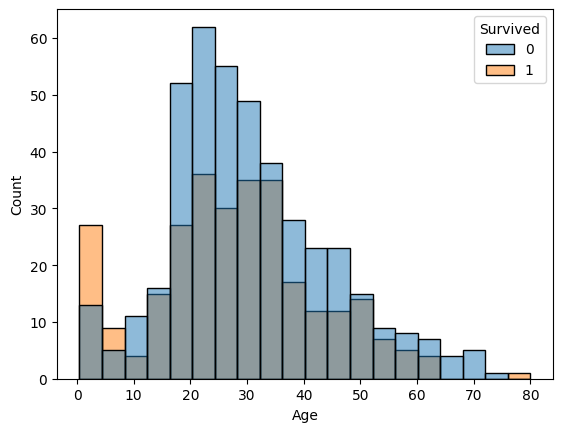

In [ ]:
sns.histplot(data=titanic_dataset, x="Age", hue="Survived")


In [ ]:
titanic_dataset.groupby(['Pclass']).Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

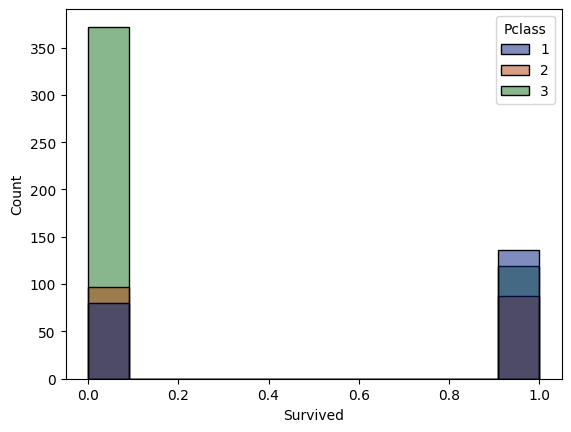

In [ ]:
# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'
sns.histplot(x='Survived', hue='Pclass', data=titanic_dataset, palette='dark');
#Take-away: Passengers that travelled in first class were more likely to survive.
#On the other hand, passengers travelling in third class were more unlikely to survive.

<Axes: xlabel='Survived', ylabel='Count'>

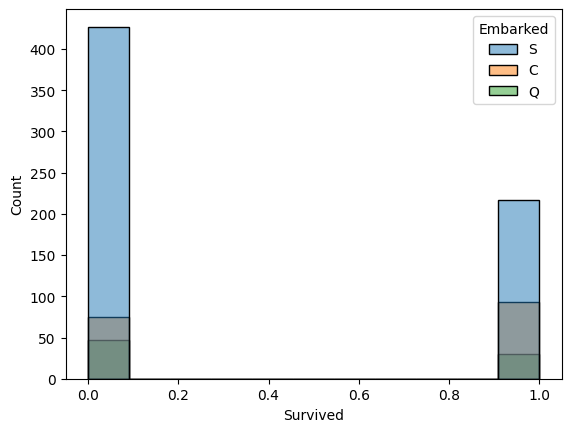

In [ ]:
# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'
sns.histplot(x='Survived', hue='Embarked', data=titanic_dataset)
# Take-away: Passengers that embarked in Southampton were less likely to survive.

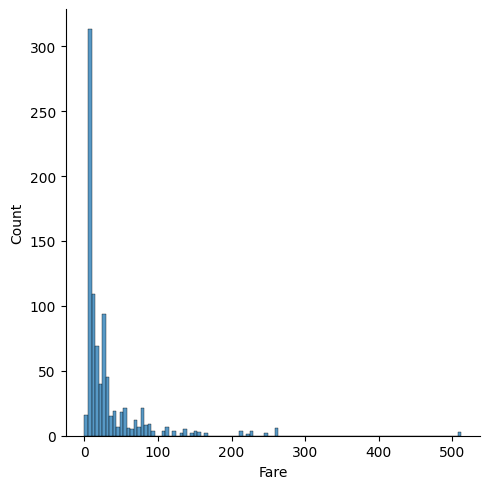

In [ ]:
# Use seaborn to plot a histogram of the 'Fare' column of titanic_dataset
sns.displot(titanic_dataset.Fare, kde=False)
# Take-away: Most passengers paid less than 100 for travelling with the Titanic

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Fare, dtype: object

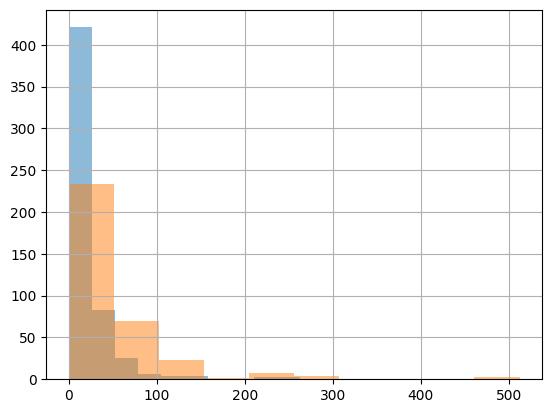

In [ ]:
# Use a pandas plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.
titanic_dataset.groupby('Survived').Fare.hist(alpha=0.5)
# Take-away: It looks as though those that paid more had a higher chance of surviving.

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Pclass, dtype: object

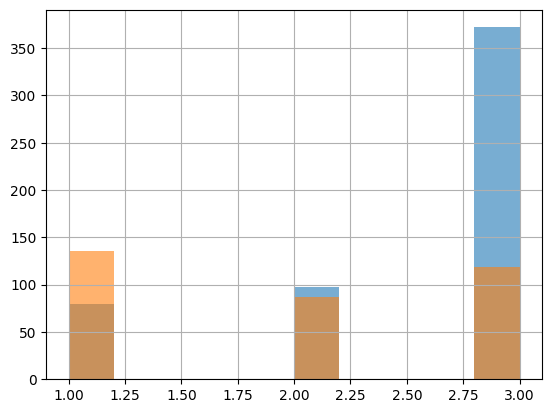

In [ ]:
# Use a pandas plotting method to plot the column 'Pclass' for each value of 'Survived' on the same plot.
titanic_dataset.groupby('Survived').Pclass.hist(alpha=0.6)
# Take-away: It looks as though those that in first class , more no of people survived (around 66%) than non survived  , in 2nd class around less than 50% survived , in 3rd class less than 25% survived
#

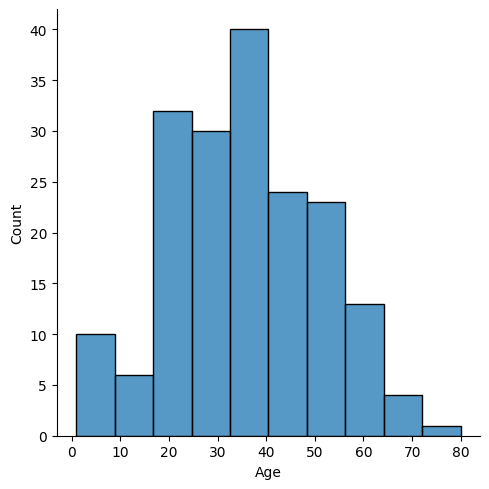

In [ ]:
#Use seaborn to plot a histogram of the 'Age' column of titanic_dataset. You'll need to drop null values before doing so
titanic_dataset_drop = titanic_dataset.dropna()
titanic_dataset_drop.shape
sns.displot(titanic_dataset_drop.Age, kde=False);

<Axes: xlabel='Survived', ylabel='Fare'>

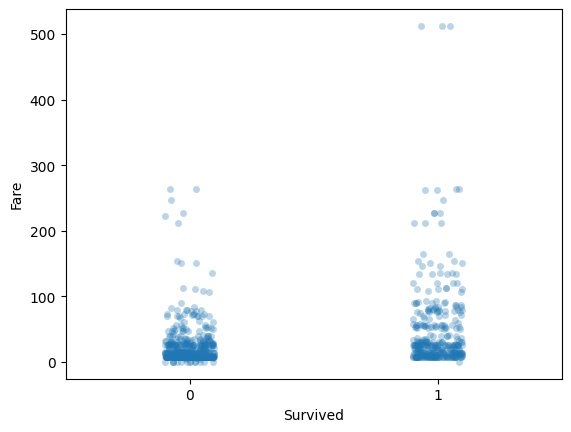

In [ ]:
# Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=titanic_dataset, alpha=0.3, jitter=True)

### 2.5 **Multi variate analysis**

<ipython-input-70-ff40004624af>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-70-ff40004624af>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-70-ff40004624af>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-70-ff40004624af>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


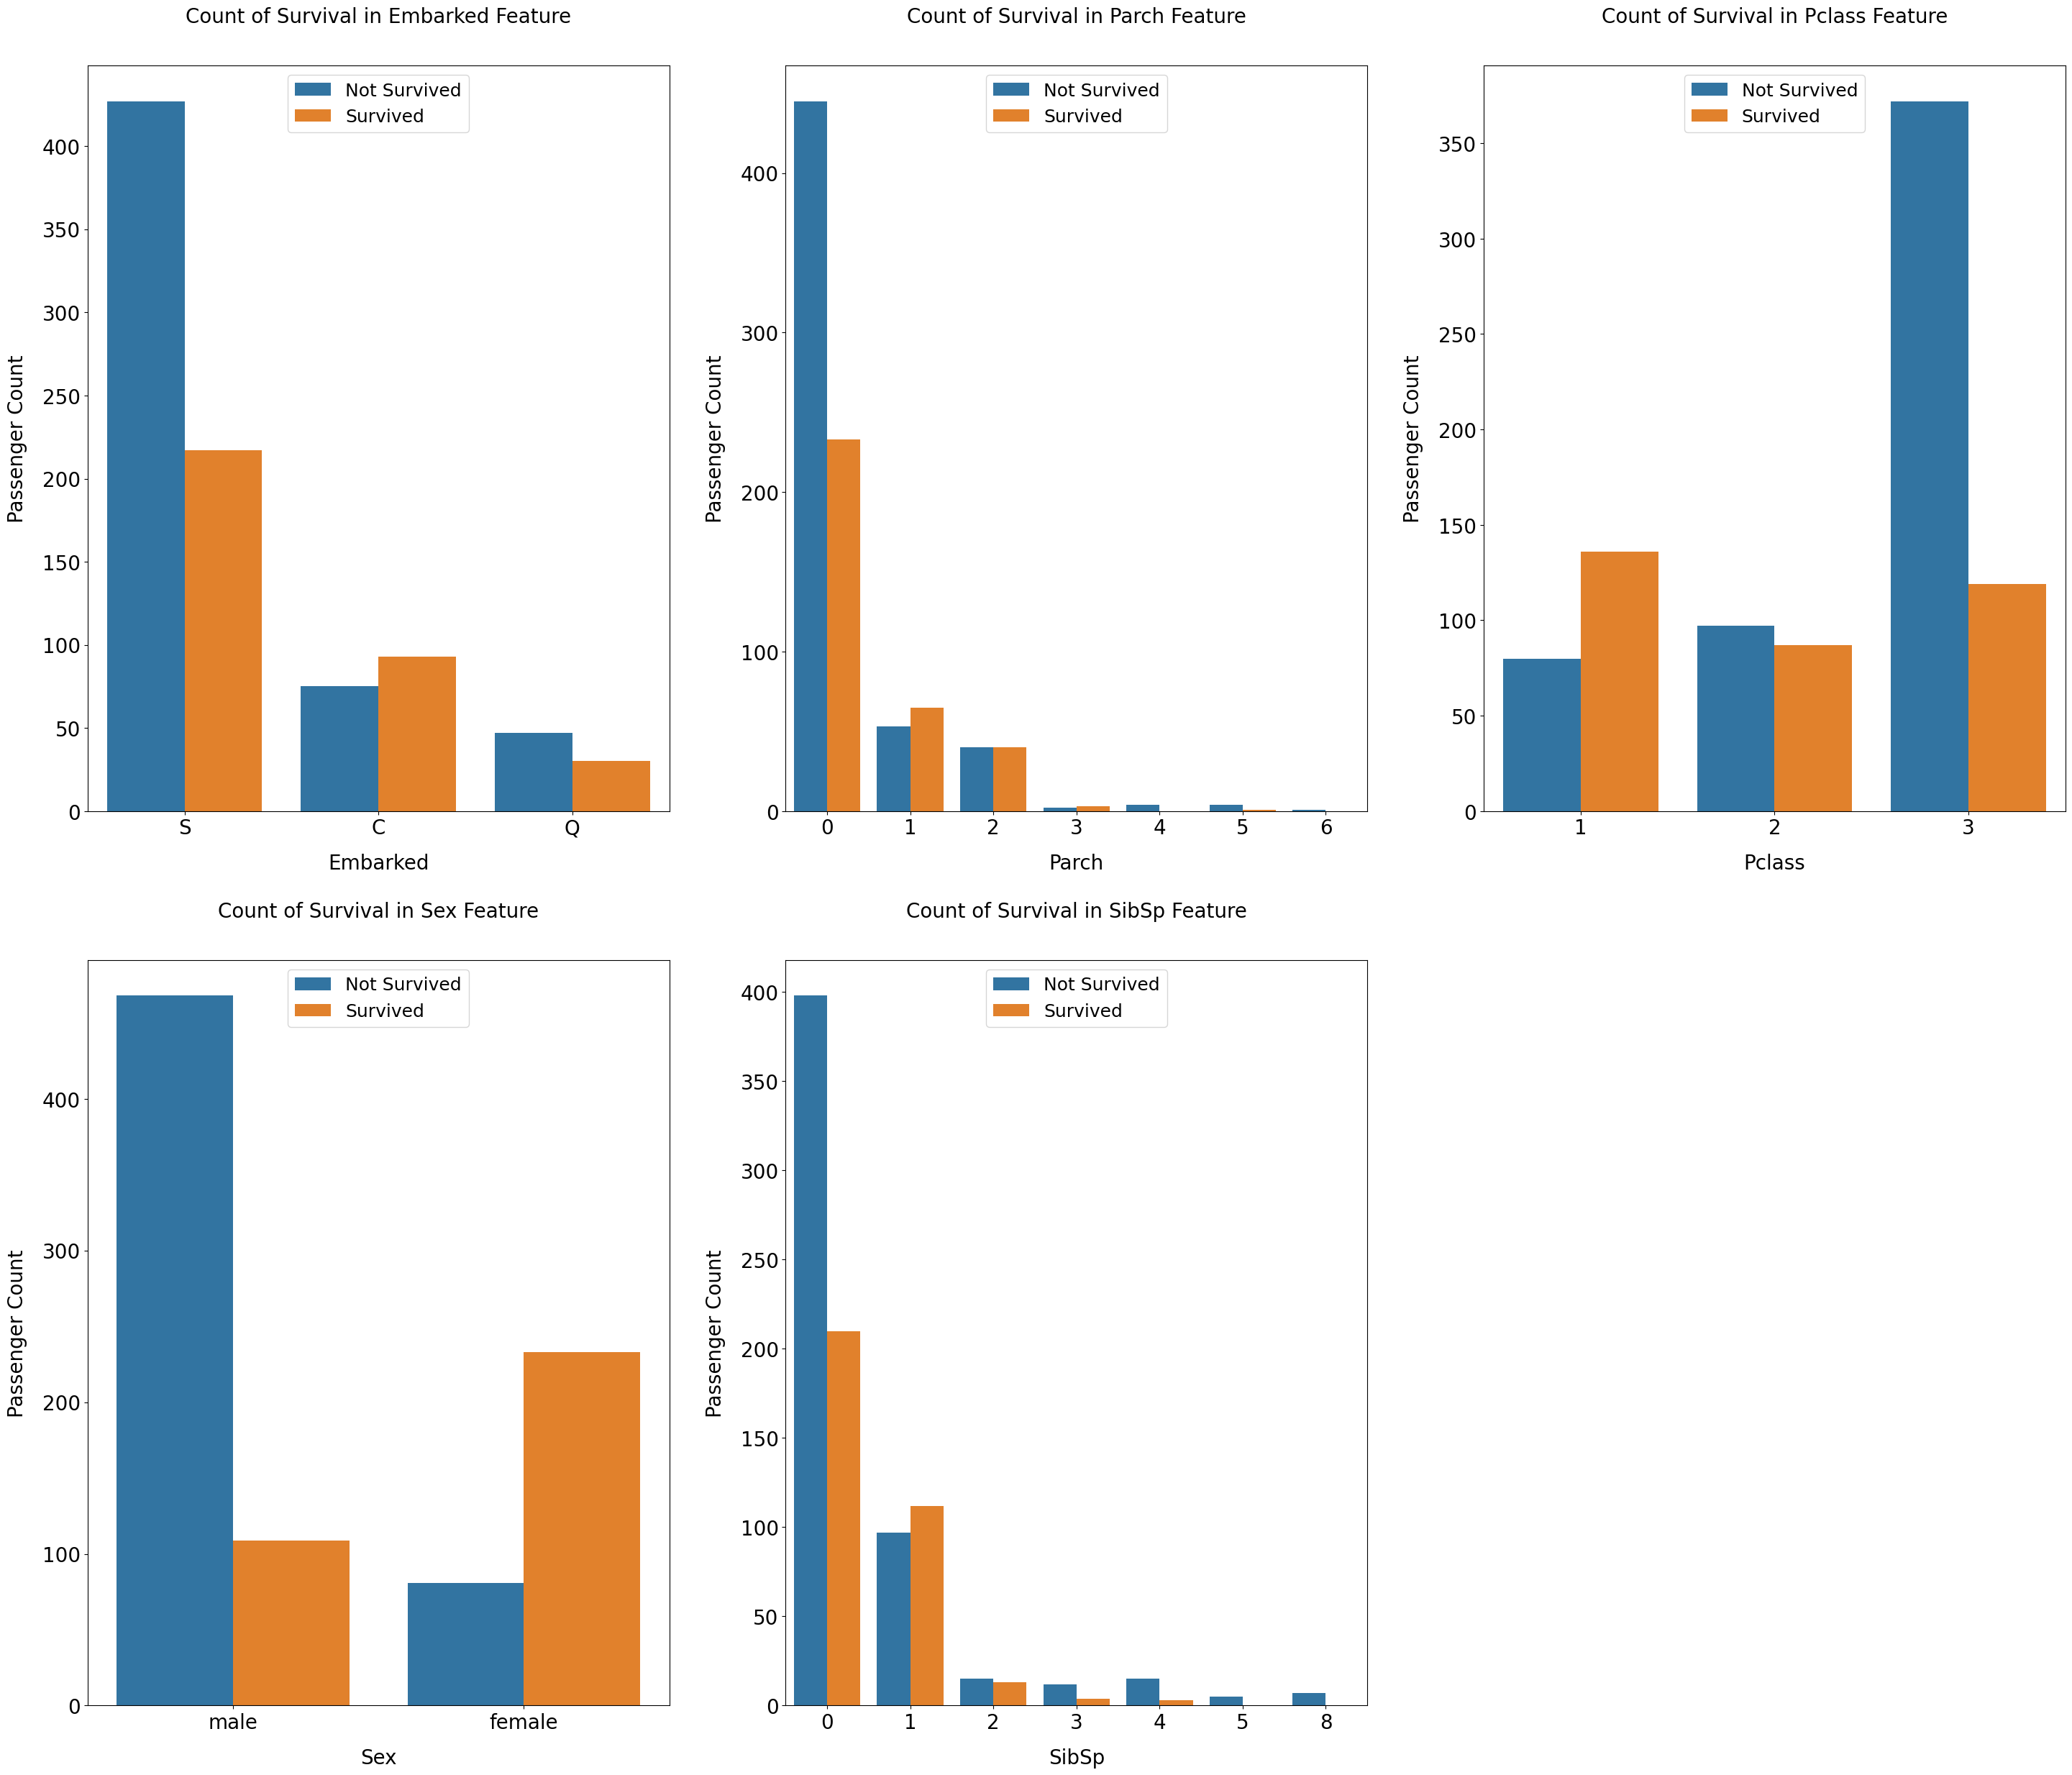

In [ ]:
#categorical features plotting
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=titanic_dataset)

    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

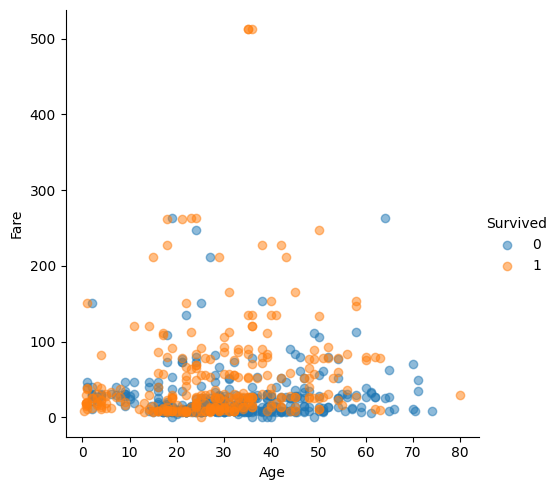

In [ ]:
# Use seaborn to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=titanic_dataset, fit_reg=False, scatter_kws={'alpha':0.5})
# Take-away: It looks like those who survived either paid quite a bit for their ticket or they were young

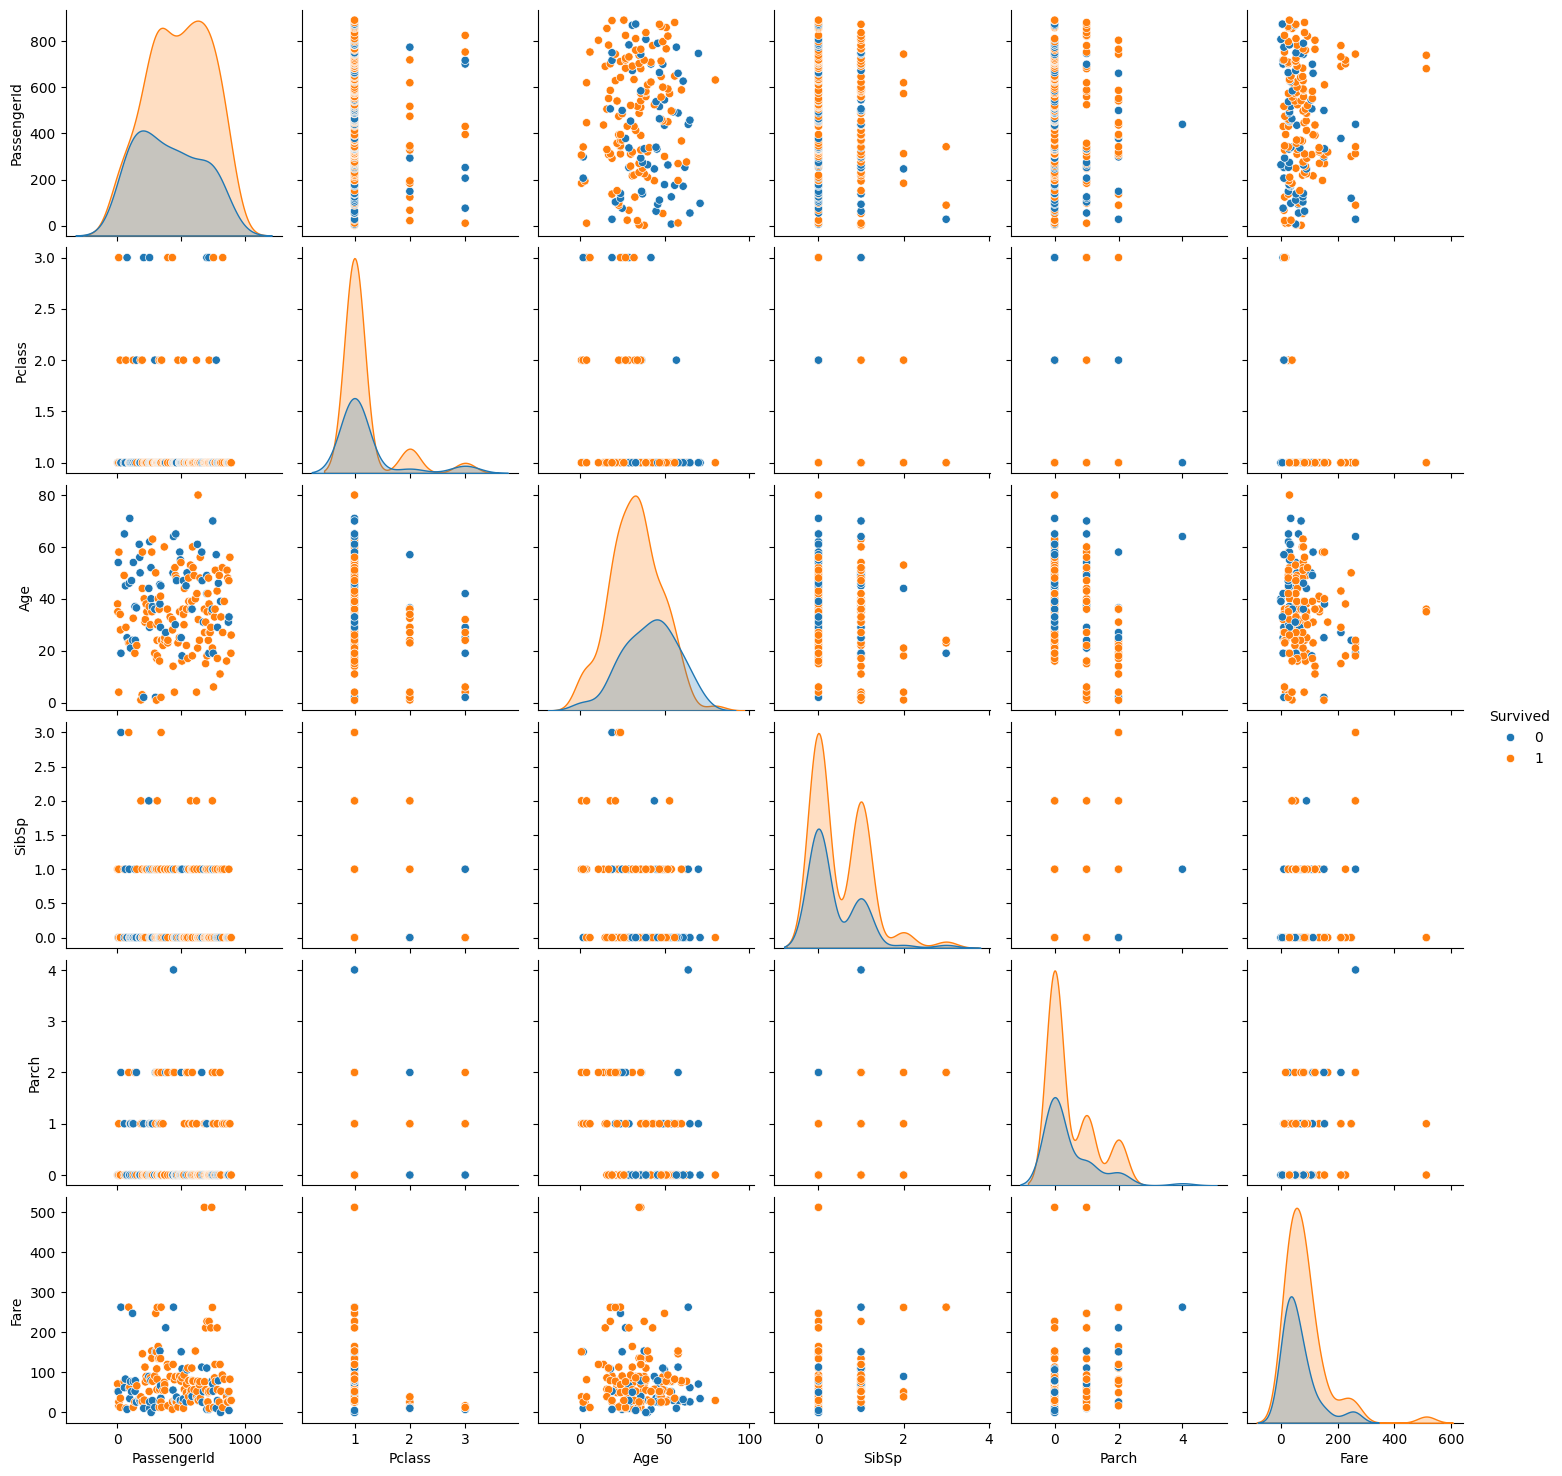

In [ ]:
# Use seaborn to create a pairplot of titanic_dataset, colored by 'Survived'.
# A pairplot is a great way to display most of the information that you have already
# discovered in a single grid of plots.
sns.pairplot(titanic_dataset_drop, hue='Survived')

# 3. Remove unnecessary columns  & Dataset Split

###3.1 **Drop columns that are not required**


In [20]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,Mr


In [21]:
combined.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
Title          0
dtype: int64

In [22]:
combined.drop([ 'Name' , 'Cabin' , 'Ticket'] , axis = 1 , inplace = True)

In [23]:
def recover_train_test_target():
    global combined

    targets = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Titanic/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]

    return train, test, targets

train, test, targets = recover_train_test_target()

In [24]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Officer
887,1,female,19.0,0,0,30.0000,S,Miss
888,3,female,21.5,1,2,23.4500,S,Miss
889,1,male,26.0,0,0,30.0000,C,Mr


In [25]:
#dividing dataset into the features and target to be predicted
#y = titanic_dataset["Survived"]
#X = titanic_dataset.drop(["Survived"], axis=1)

In [26]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
891,3,male,34.5,0,0,7.8292,Q,Mr
892,3,female,47.0,1,0,7.0000,S,Mrs
893,2,male,62.0,0,0,9.6875,Q,Mr
894,3,male,27.0,0,0,8.6625,S,Mr
895,3,female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
1304,3,male,25.0,0,0,8.0500,S,Mr
1305,1,female,39.0,0,0,108.9000,C,Mr
1306,3,male,38.5,0,0,7.2500,S,Mr
1307,3,male,25.0,0,0,8.0500,S,Mr


In [27]:
targets.shape

(891,)

#4. **Handle outliers**

<Axes: >

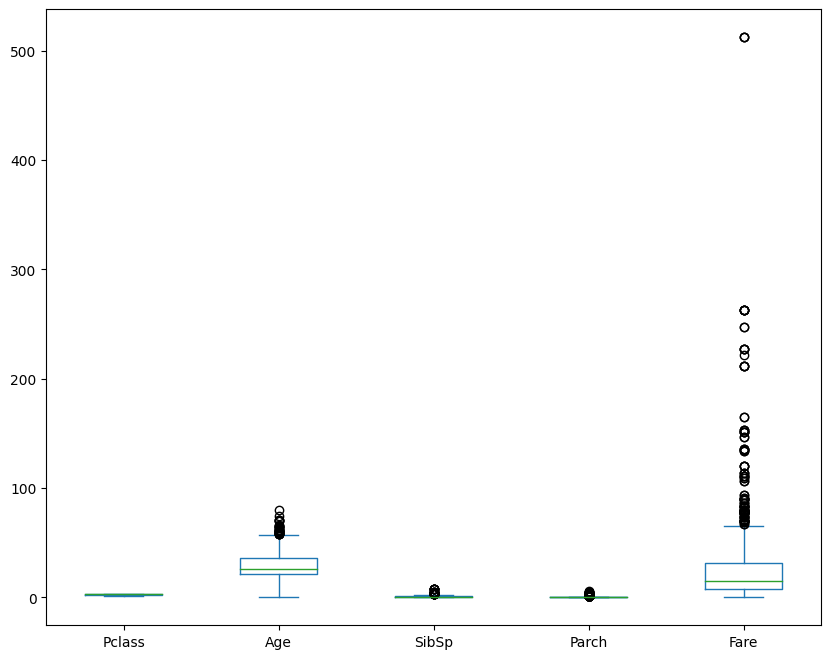

In [28]:
# Check for outliers
train.plot(kind='box', figsize= (10,8))


In [29]:
#Handle outliers
cols= ['Age', 'SibSp', 'Parch', 'Fare']

train[cols]= train[cols].clip(lower= train[cols].quantile(0.15), upper= train[cols].quantile(0.85), axis=1)


<ipython-input-29-0ff3a453c48c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[cols]= train[cols].clip(lower= train[cols].quantile(0.15), upper= train[cols].quantile(0.85), axis=1)


In [30]:
train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,28.712121,0.317621,0.239057,22.993485
std,0.836071,8.492423,0.465813,0.426747,17.867568
min,1.000000,18.000000,0.000000,0.000000,7.750000
25%,2.000000,21.500000,0.000000,0.000000,7.910400
50%,3.000000,26.000000,0.000000,0.000000,14.454200
75%,3.000000,36.000000,1.000000,0.000000,31.000000
max,3.000000,42.000000,1.000000,1.000000,56.495800


In [31]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.7500,S,Mr
1,1,female,38.0,1,0,56.4958,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [32]:
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.3, random_state=42 , stratify = targets)
# TO DO stratify the test train split

# Check the shape of X_train, X_test, y_train, y_test
X_train.shape

(623, 8)

#4. Feature engineering

####4.1. Correlations Coefficient between different vaiable pair
##### The coefficient analysis is highly useful in understanding the important features to build the model.
#####Like here we see that Pclass and FAre are highly correlated, and from the EDa above we found out that Pclass 1 people were likely to survive more than others.If we build the model now to predict the survival of passengers, we should consider these two variables/features in our model.

In [ ]:
df_train_corr = X_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

<ipython-input-92-cdf05c0b0a4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_corr = X_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()


In [ ]:
# Correlation Coefficient in training dataset with coeffiecient more than 0.1
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.722226
8,Age,Pclass,0.434206
10,SibSp,Parch,0.367481
12,Fare,SibSp,0.260111
14,Fare,Age,0.222314
16,Parch,Fare,0.219370
18,SibSp,Age,0.195550


####4.2. **Heatmap to visualize Correlation**


<ipython-input-94-cf669240c673>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')


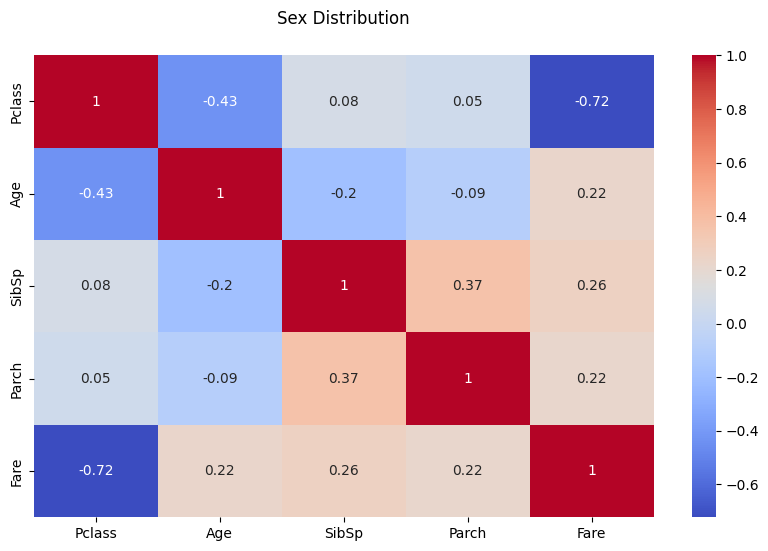

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Sex Distribution', size=12, y=1.05)
plt.show()

####**4.3. Binning Continuous Features**

Divide the continuous features like age and fare in different bins to analyze better

**Fare** feature is positively skewed and survival rate is extremely high on the right end. The groups at the left side of the graph has the lowest survival rate and the groups at the right side of the graph has the highest survival rate.There is also an unusual group **(18.782, 26.0]** in the middle with high survival rate that is captured in this process.

In [ ]:
train['Fare'] = pd.qcut(train['Fare'], 13)

ValueError: Bin edges must be unique: array([ 7.55      ,  7.55      ,  7.75      ,  7.8958    ,  8.05      ,
       10.5       , 13.        , 15.85      , 24.        , 26.55      ,
       33.30769231, 55.9       , 77.9583    , 77.9583    ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

ValueError: Could not interpret value `Survived` for `hue`. An entry with this name does not appear in `data`.

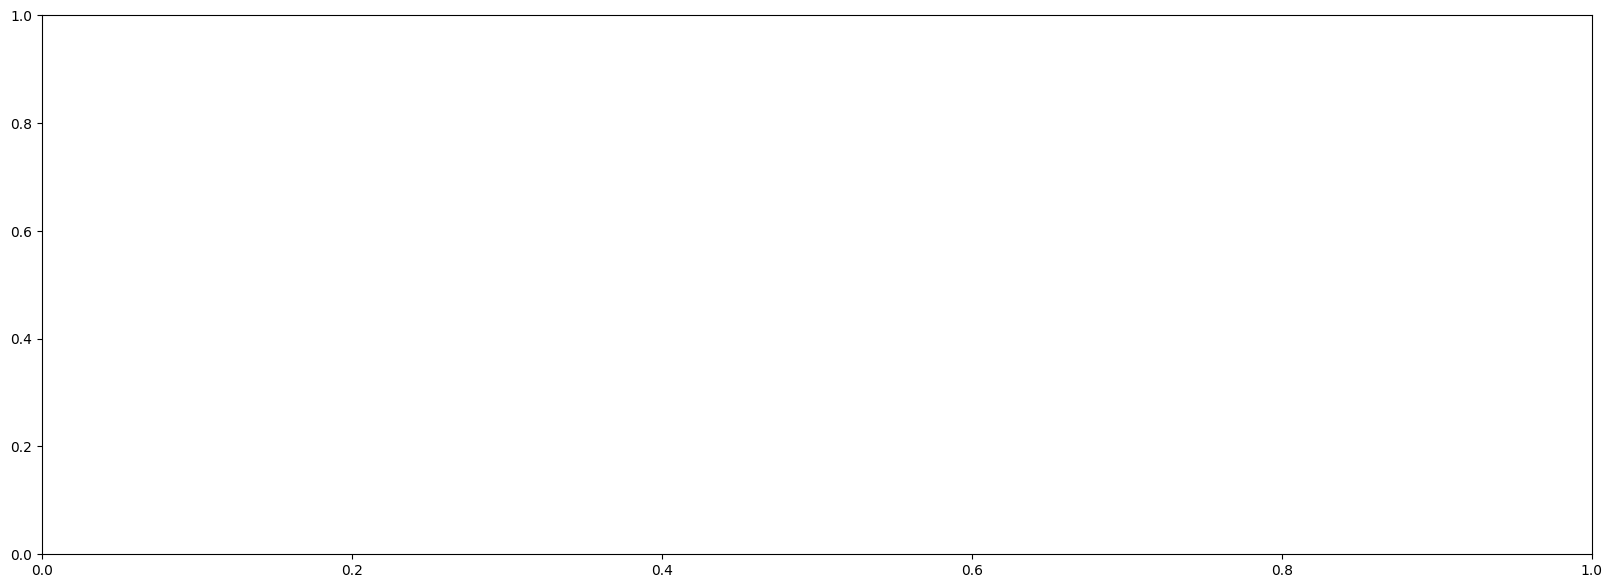

In [ ]:
fig, axs = plt.subplots(figsize=(20, 7))
sns.countplot(x='Fare', hue='Survived', data=train)

plt.xlabel('Fare', size=10, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=10, y=1.05)

plt.show()

**Age** feature has a normal distribution with some spikes. The first bin has the highest survival rate and 2nd bin has the lowest survival rate. There is also an unusual group (31.0, 36.0] with high survival rate that is captured in this process.

In [ ]:
train['Age'] = pd.qcut(train['Age'], 10)

ValueError: Bin edges must be unique: array([16., 16., 20., 22., 25., 26., 30., 34., 40., 47., 47.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

ValueError: Could not interpret value `Survived` for `hue`. An entry with this name does not appear in `data`.

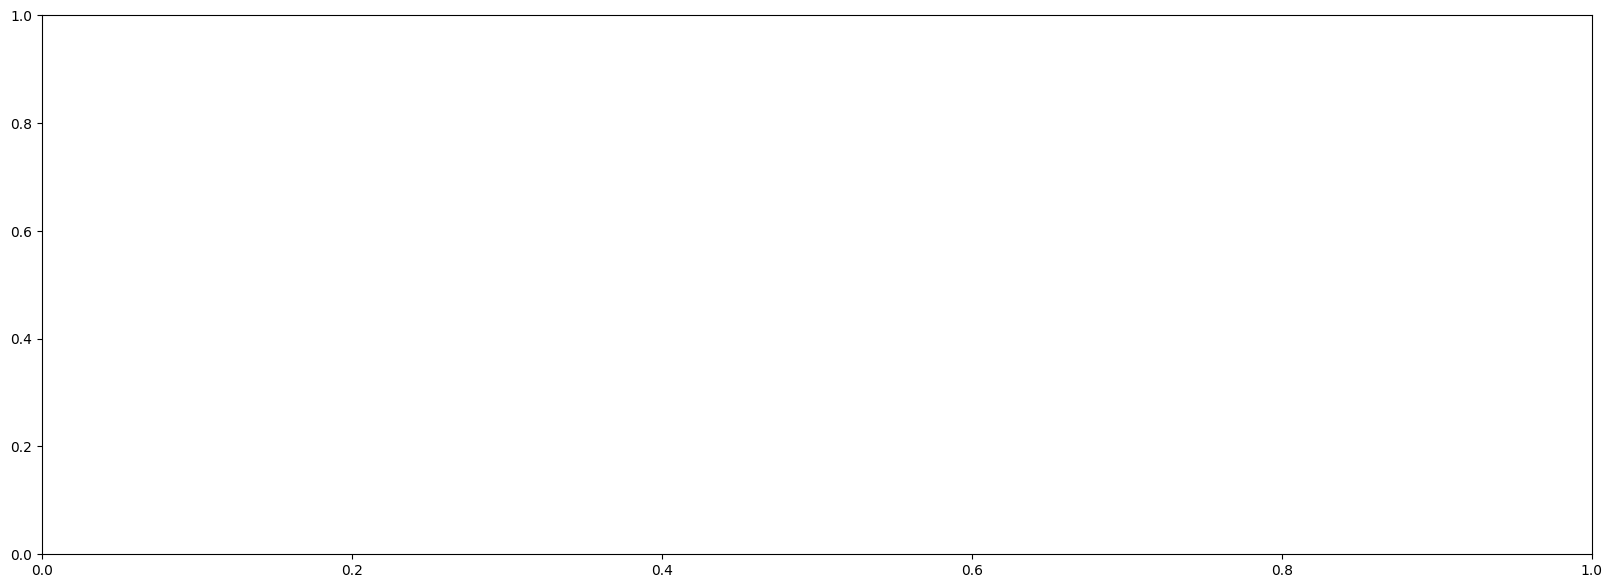

In [ ]:
fig, axs = plt.subplots(figsize=(20, 7))
sns.countplot(x='Age', hue='Survived', data=train)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

####**4.4. Feature Transformation**




**One-Hot Encoding the Categorical Features**
The categorical features (`Pclass`, `Sex`, `Embarked`) are converted to one-hot encoded features with OneHotEncoder. `Age` and `Fare` features are not converted because they are ordinal unlike the previous ones.

In [33]:
#  THIS FITS AND TRANSFORMS EACH SET SEPERATELY IE TRAIN AND TEST
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Pclass', 'Sex', 'Embarked' , 'Title']
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder.fit(X_train[cat_features])

OneHotEncoder(drop='first', sparse_output=False)

**One-Hot Encode the training features**

In [34]:
train_encoded = encoder.transform(X_train[cat_features])
print(train_encoded)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(cat_features))
# Reset index before concatenating
train_data = X_train.drop(cat_features, axis=1).reset_index(drop=True)
train_encoded_df = train_encoded_df.reset_index(drop=True)
train_data = pd.concat([train_data, train_encoded_df], axis=1)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**One-Hot Encode the test features**

In [35]:
test_encoded = encoder.transform(X_test[cat_features])
test_encoded
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(cat_features))
# Reset index before concatenating
test_data = X_test.drop(cat_features, axis=1).reset_index(drop=True)
test_encoded_df = test_encoded_df.reset_index(drop=True)
test_data = pd.concat([test_data, test_encoded_df], axis=1)

In [36]:
train_data

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,19.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,25.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,21.5,0,0,7.8792,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40.0,0,0,7.7500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,28.0,1,0,15.8500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,34.0,1,0,21.0000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
619,32.0,0,0,13.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
620,42.0,1,1,34.3750,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
621,42.0,0,0,38.5000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
test_data

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,42.0,0,0,32.3208,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,19.0,0,0,7.8958,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,25.0,0,0,7.7500,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27.0,0,0,7.7500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,42.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,18.0,0,1,22.0250,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
264,27.0,0,0,30.5000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
265,21.0,0,0,16.1000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
266,33.0,0,0,8.6542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### **Sampling**

In [48]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_sampled, y_train_sampled = sm.fit_resample(train_data, y_train )

###  **Scaling the train and the test features**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

In [39]:
X_train

array([[-1.16463872,  1.5327956 , -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       [-0.46422531, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       [-0.8727998 , -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       ...,
       [ 1.52027935,  1.5327956 ,  1.8404684 , ...,  2.4178821 ,
        -0.15161961, -0.08038679],
       [ 1.52027935, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       [-1.16463872, -0.65240271,  1.8404684 , ..., -0.4135851 ,
        -0.15161961, -0.08038679]])

In [40]:
X_test

array([[ 1.52027935, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       [-1.16463872, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       [-0.46422531, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       ...,
       [-0.93116759, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       [ 0.46965923, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679],
       [ 0.81986594, -0.65240271, -0.54333994, ..., -0.4135851 ,
        -0.15161961, -0.08038679]])

In [41]:
y_train.mean()

0.38362760834670945

In [42]:
X_train = X_train_sampled
y_train = y_train_sampled

NameError: name 'X_train_sampled' is not defined

In [71]:
y_train.mean()

0.38362760834670945

#**5.0 Model Evaluation**

###**5.1 Base Model - Logistic regression (linear)**

In [72]:
# Fit a logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state = 42, max_iter = 10)
model.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.72      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###**5.2 Logistic regression (linear) - with l2 regularization**

In [73]:
# Fit a logistic regression model to the training data
model2 = LogisticRegression(penalty='l2', solver = 'newton-cholesky', max_iter=200)
model2.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model2.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8134328358208955
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       165
           1       0.77      0.73      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



###**5.3  Logistic regression with polynomial degree - 2 and l2 regularization**

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# Create a pipeline with polynomial features and logistic regression
model3 = make_pipeline(PolynomialFeatures(2, include_bias=True), LogisticRegression(penalty='l2', solver = 'newton-cholesky', max_iter = 1000, random_state = 42))

# Fit the model on the training data
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.7985074626865671
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       165
           1       0.78      0.66      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



###**5.4 Decision tree classification model with K fold**

In [75]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Cross Val Accuracy: 0.810 (0.044)


<ipython-input-76-e55ea970b43d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

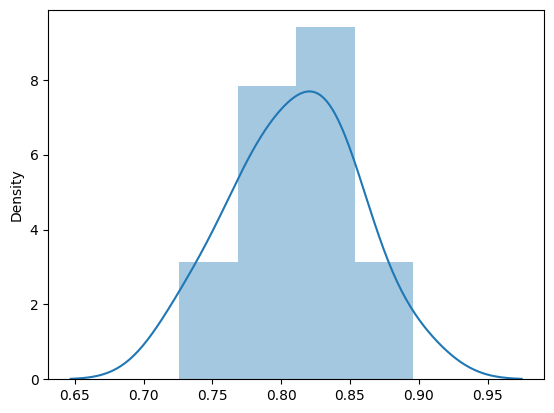

In [76]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
model_dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=3)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Cross Val Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)

In [77]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.72      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###**5.5 Bagging classifier with k fold**

Cross Val Accuracy: 0.796 (0.030)


<ipython-input-78-07a31b21d419>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

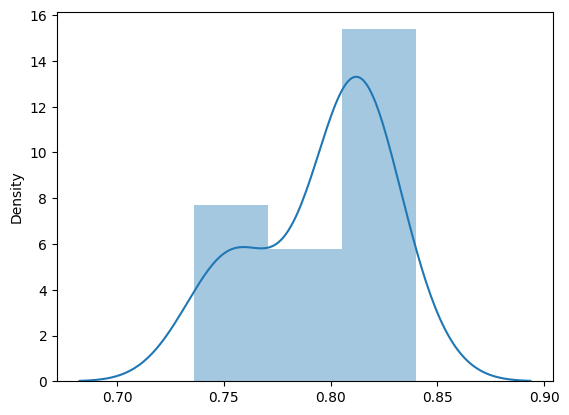

In [78]:
model = BaggingClassifier(random_state=1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=3)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Cross Val Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)

In [79]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       165
           1       0.76      0.71      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



###**5.6 Random forest classifier with K Fold**

Cross Val Accuracy: 0.803 (0.028)


<ipython-input-80-bb9b55eb4c6c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

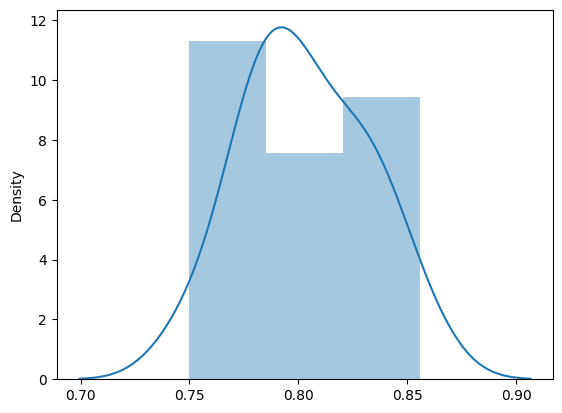

In [80]:
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier(random_state=1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Cross Val Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)

In [81]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       165
           1       0.78      0.68      0.73       103

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



###**5.7 Random forest classifier hypertuning with GridSearch**

In [82]:
[int(x) for x in np.linspace(3, 40, num = 12)]

[3, 6, 9, 13, 16, 19, 23, 26, 29, 33, 36, 40]

In [83]:
n_estimators = [5,10 ,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(3, 20, num = 6)] # maximum number of levels allowed in each decision tree
min_samples_split = [2,6, 10] # minimum sample number to split a node
min_samples_leaf = [1,3,4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

In [84]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=1)
rf_random = GridSearchCV(estimator = model,param_grid = random_grid,
                cv = 5, verbose=2,  n_jobs = -1)

In [58]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 6, 9, 13, 16, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 10, 20, 50, 100]},
             verbose=2)

####**5.6.1  Get the Random forest classifier best model with hypertuning parameters**



In [59]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')
best_model = rf_random.best_estimator_

Random grid:  {'n_estimators': [5, 10, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 6, 9, 13, 16, 20], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'bootstrap': False, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}  



#### **5.6.2  Evaluating Random forest classifier best model with k fold**


Cross Val Accuracy: 0.827 (0.043)


<ipython-input-60-5c3de24aa3c8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

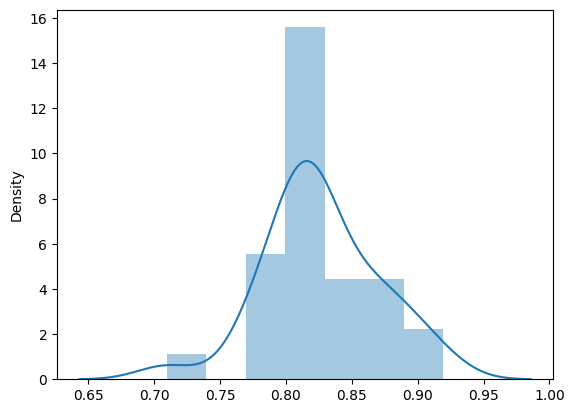

In [60]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(best_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Cross Val Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)

In [61]:
y_pred = best_model.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8246268656716418
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       165
           1       0.83      0.69      0.75       103

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



### **5.7 Simple XGBoost classifier**

Cross Val Accuracy: 0.803 (0.028)


<ipython-input-62-34a2236e1427>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

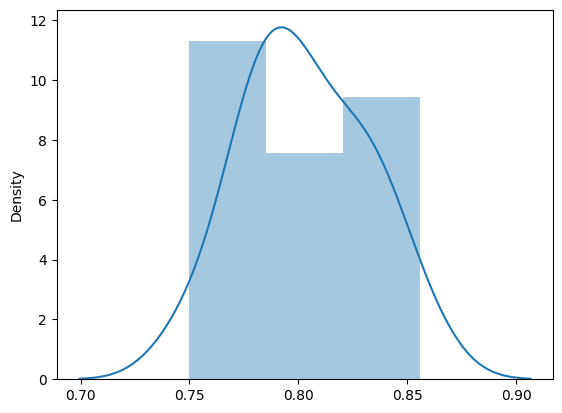

In [62]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# define the model
model_xbg = XGBRFClassifier(random_state=1)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Cross Val Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)

In [63]:
model_xbg.fit(X_train , y_train)
y_test_pred = model_xbg.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.8208955223880597
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       165
           1       0.82      0.68      0.74       103

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



##### **5.7.1 XGBoost classifier with hypertuning parameters**





In [64]:
params = {
        'n_estimators' : [5,10 , 20,50,100], # number of trees in the random forest
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [int(x) for x in np.linspace(3, 40, num = 12)]
        }




In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1)

In [66]:
from sklearn.model_selection import StratifiedKFold

folds = 5
param_comb = 100
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [67]:
random_search_xgb.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:51:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f78f17a9380>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type...
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           nthread=1, num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 6, 9, 13, 16, 19, 23,
                                                      26, 29, 33, 36, 40],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [5, 10, 20, 50, 100],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [68]:

# print the best parameters
print ('Best Parameters: ', random_search_xgb.best_params_, ' \n')
best_model = random_search_xgb.best_estimator_

Best Parameters:  {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.5, 'colsample_bytree': 0.8}  



In [69]:
best_model.fit(X_train , y_train)
y_test_pred = best_model.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       165
           1       0.81      0.64      0.72       103

    accuracy                           0.81       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.81      0.80       268



###**5.8 Choose the best model for evaluation**

In [85]:

best_model = rf_random.best_estimator_


###**5.9 Predict on the actual test data**

In [86]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
891,3,male,34.5,0,0,7.8292,Q,Mr
892,3,female,47.0,1,0,7.0000,S,Mrs
893,2,male,62.0,0,0,9.6875,Q,Mr
894,3,male,27.0,0,0,8.6625,S,Mr
895,3,female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
1304,3,male,25.0,0,0,8.0500,S,Mr
1305,1,female,39.0,0,0,108.9000,C,Mr
1306,3,male,38.5,0,0,7.2500,S,Mr
1307,3,male,25.0,0,0,8.0500,S,Mr


In [87]:
test_dataset= pd.read_csv('/content/gdrive/MyDrive/Kaggle/Titanic/test.csv')

In [88]:
passengerId = test_dataset['PassengerId']

In [89]:
passengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [90]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [91]:
test_encoded = encoder.transform(test[cat_features])
test_encoded
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(cat_features))
# Reset index before concatenating
test_data = test.drop(cat_features, axis=1).reset_index(drop=True)
test_encoded_df = test_encoded_df.reset_index(drop=True)
test_data = pd.concat([test_data, test_encoded_df], axis=1)

In [92]:
test_data

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,34.5,0,0,7.8292,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,47.0,1,0,7.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,62.0,0,0,9.6875,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27.0,0,0,8.6625,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,22.0,1,1,12.2875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
414,39.0,0,0,108.9000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,38.5,0,0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
416,25.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [93]:
test_data_scaled = scaler.transform(test_data)

In [94]:
y_pred = best_model.predict(test_data_scaled)

In [95]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [96]:
y_pred.shape

(418,)

In [97]:
y_pred.mean()

0.34688995215311

In [98]:
submission = pd.DataFrame({'PassengerId':passengerId, 'Survived':y_pred})
submission = submission[['PassengerId', 'Survived']]
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [99]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
submission.to_csv("/content/gdrive/MyDrive/Kaggle/Titanic/submission.csv", index=False)